In [1]:
! pip install minisom

  Using cached MiniSom-2.3.0-py3-none-any.whl


In [2]:
import minisom
from minisom import MiniSom
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.cluster import KMeans

## Homework4 Self-organizing map(SOM)

In this notebook we will use the data of 2500 molecules we already obtained by the end of the Mordred part of Week9 hands-on session. You can download the dataset `mordred_df.csv` from Canvas.

In [3]:
data = pd.read_csv("./mordred_df.csv")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (158,167,176,185,194,203,212,221,230,239,248,365,374,383,392,401,410,419,428,437,446,455,464,472,480,488,496,504,512,520,528,536,544,552,560,568,576,584,592,600,608,616,624,632,640,648,656,890,891,906,907,1592) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,HOMO,LUMO,GAP,R2,ZPVE,U0,U,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,10000,10000,-0.2818,0.0280,0.3097,1109.2219,0.163679,-365.089448,-365.079822,...,8.124151,34.544698,113.084064,5.951793,67,8,30.0,31.0,4.722222,2.111111
1,1,10001,10001,-0.2338,0.0329,0.2667,1089.3310,0.175667,-345.190043,-345.180226,...,8.124151,34.544698,112.100048,5.605002,67,8,30.0,31.0,4.722222,2.111111
2,2,10002,10002,-0.2355,0.0301,0.2656,1055.7727,0.165093,-361.232458,-361.222832,...,8.124151,34.544698,113.095297,5.952384,67,8,30.0,31.0,4.722222,2.111111
3,3,10003,10003,-0.2497,0.0220,0.2716,1013.7067,0.152666,-381.108212,-381.099011,...,8.124151,34.544698,114.079313,6.337740,67,8,30.0,31.0,4.722222,2.111111
4,4,10004,10004,-0.2468,0.0315,0.2783,1158.4078,0.175927,-345.197890,-345.188039,...,8.124151,34.544698,112.100048,5.605002,67,8,30.0,31.0,4.722222,2.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,12495,12495,-0.2358,0.0769,0.3128,853.7899,0.154789,-384.924399,-384.917197,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667
2496,2496,12496,12496,-0.2351,0.0884,0.3235,909.1024,0.178523,-349.001974,-348.994464,...,9.450066,58.686602,112.088815,5.604441,56,7,46.0,56.0,2.423611,1.666667
2497,2497,12497,12497,-0.2260,0.0838,0.3098,850.3884,0.154001,-384.917317,-384.909969,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667
2498,2498,12498,12498,-0.2464,0.0896,0.3360,852.9093,0.154925,-384.926418,-384.919218,...,9.450066,58.686602,114.068080,6.337116,56,7,46.0,56.0,2.423611,1.666667


We picked 5 features from the dataset as the training data for SOM.

The meaning of these descriptors can be found here: http://mordred-descriptor.github.io/documentation/master/descriptors.html

In [5]:
subset = data[['nAtom', 'nBonds','bpol','apol','TopoPSA']]
traindata = subset.values

#normalize training data
traindata = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0)

### To-do 1: Plot the feature correlation diagram for the dataframe `subset`. 
* Please refer to the feature correlation diagram in week5 hands-on jupyternotebook.

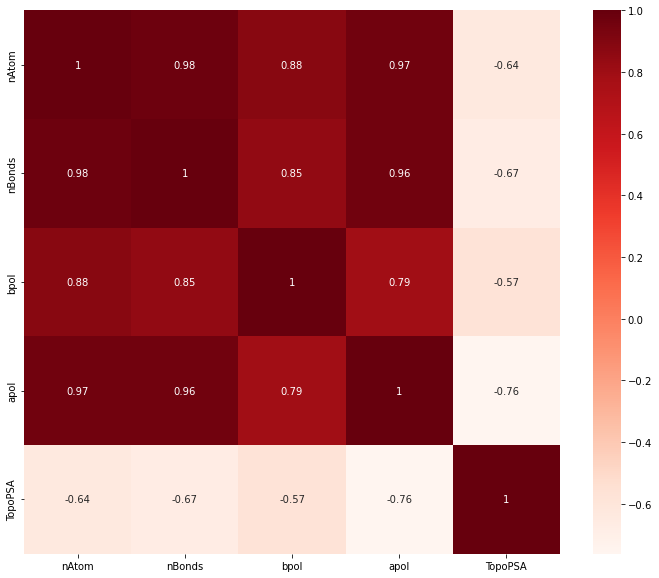

In [6]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = subset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Train SOM with the traindata:

In [7]:
# Define a MiniSom object
size = 50
som = MiniSom(size, size, traindata.shape[1], sigma=1.0, learning_rate=1.0,neighborhood_function='gaussian', random_seed=0)

# Initialize the weights by PCA
som.pca_weights_init(traindata)

# trains the SOM with specified iterations
som.train(traindata, 5000) 

Get the errors:

In [8]:
print('Topographic error: ', som.topographic_error(traindata))
print('Quantization error: ', som.quantization_error(traindata))

/opt/conda/lib/python3.9/site-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


Topographic error:  0.1132
Quantization error:  0.07760497732940605


### To-do 2: Visualize the SOM grid, show all the best matching units on it in red dots.

In [9]:
som.winner(traindata[0])

(2, 37)

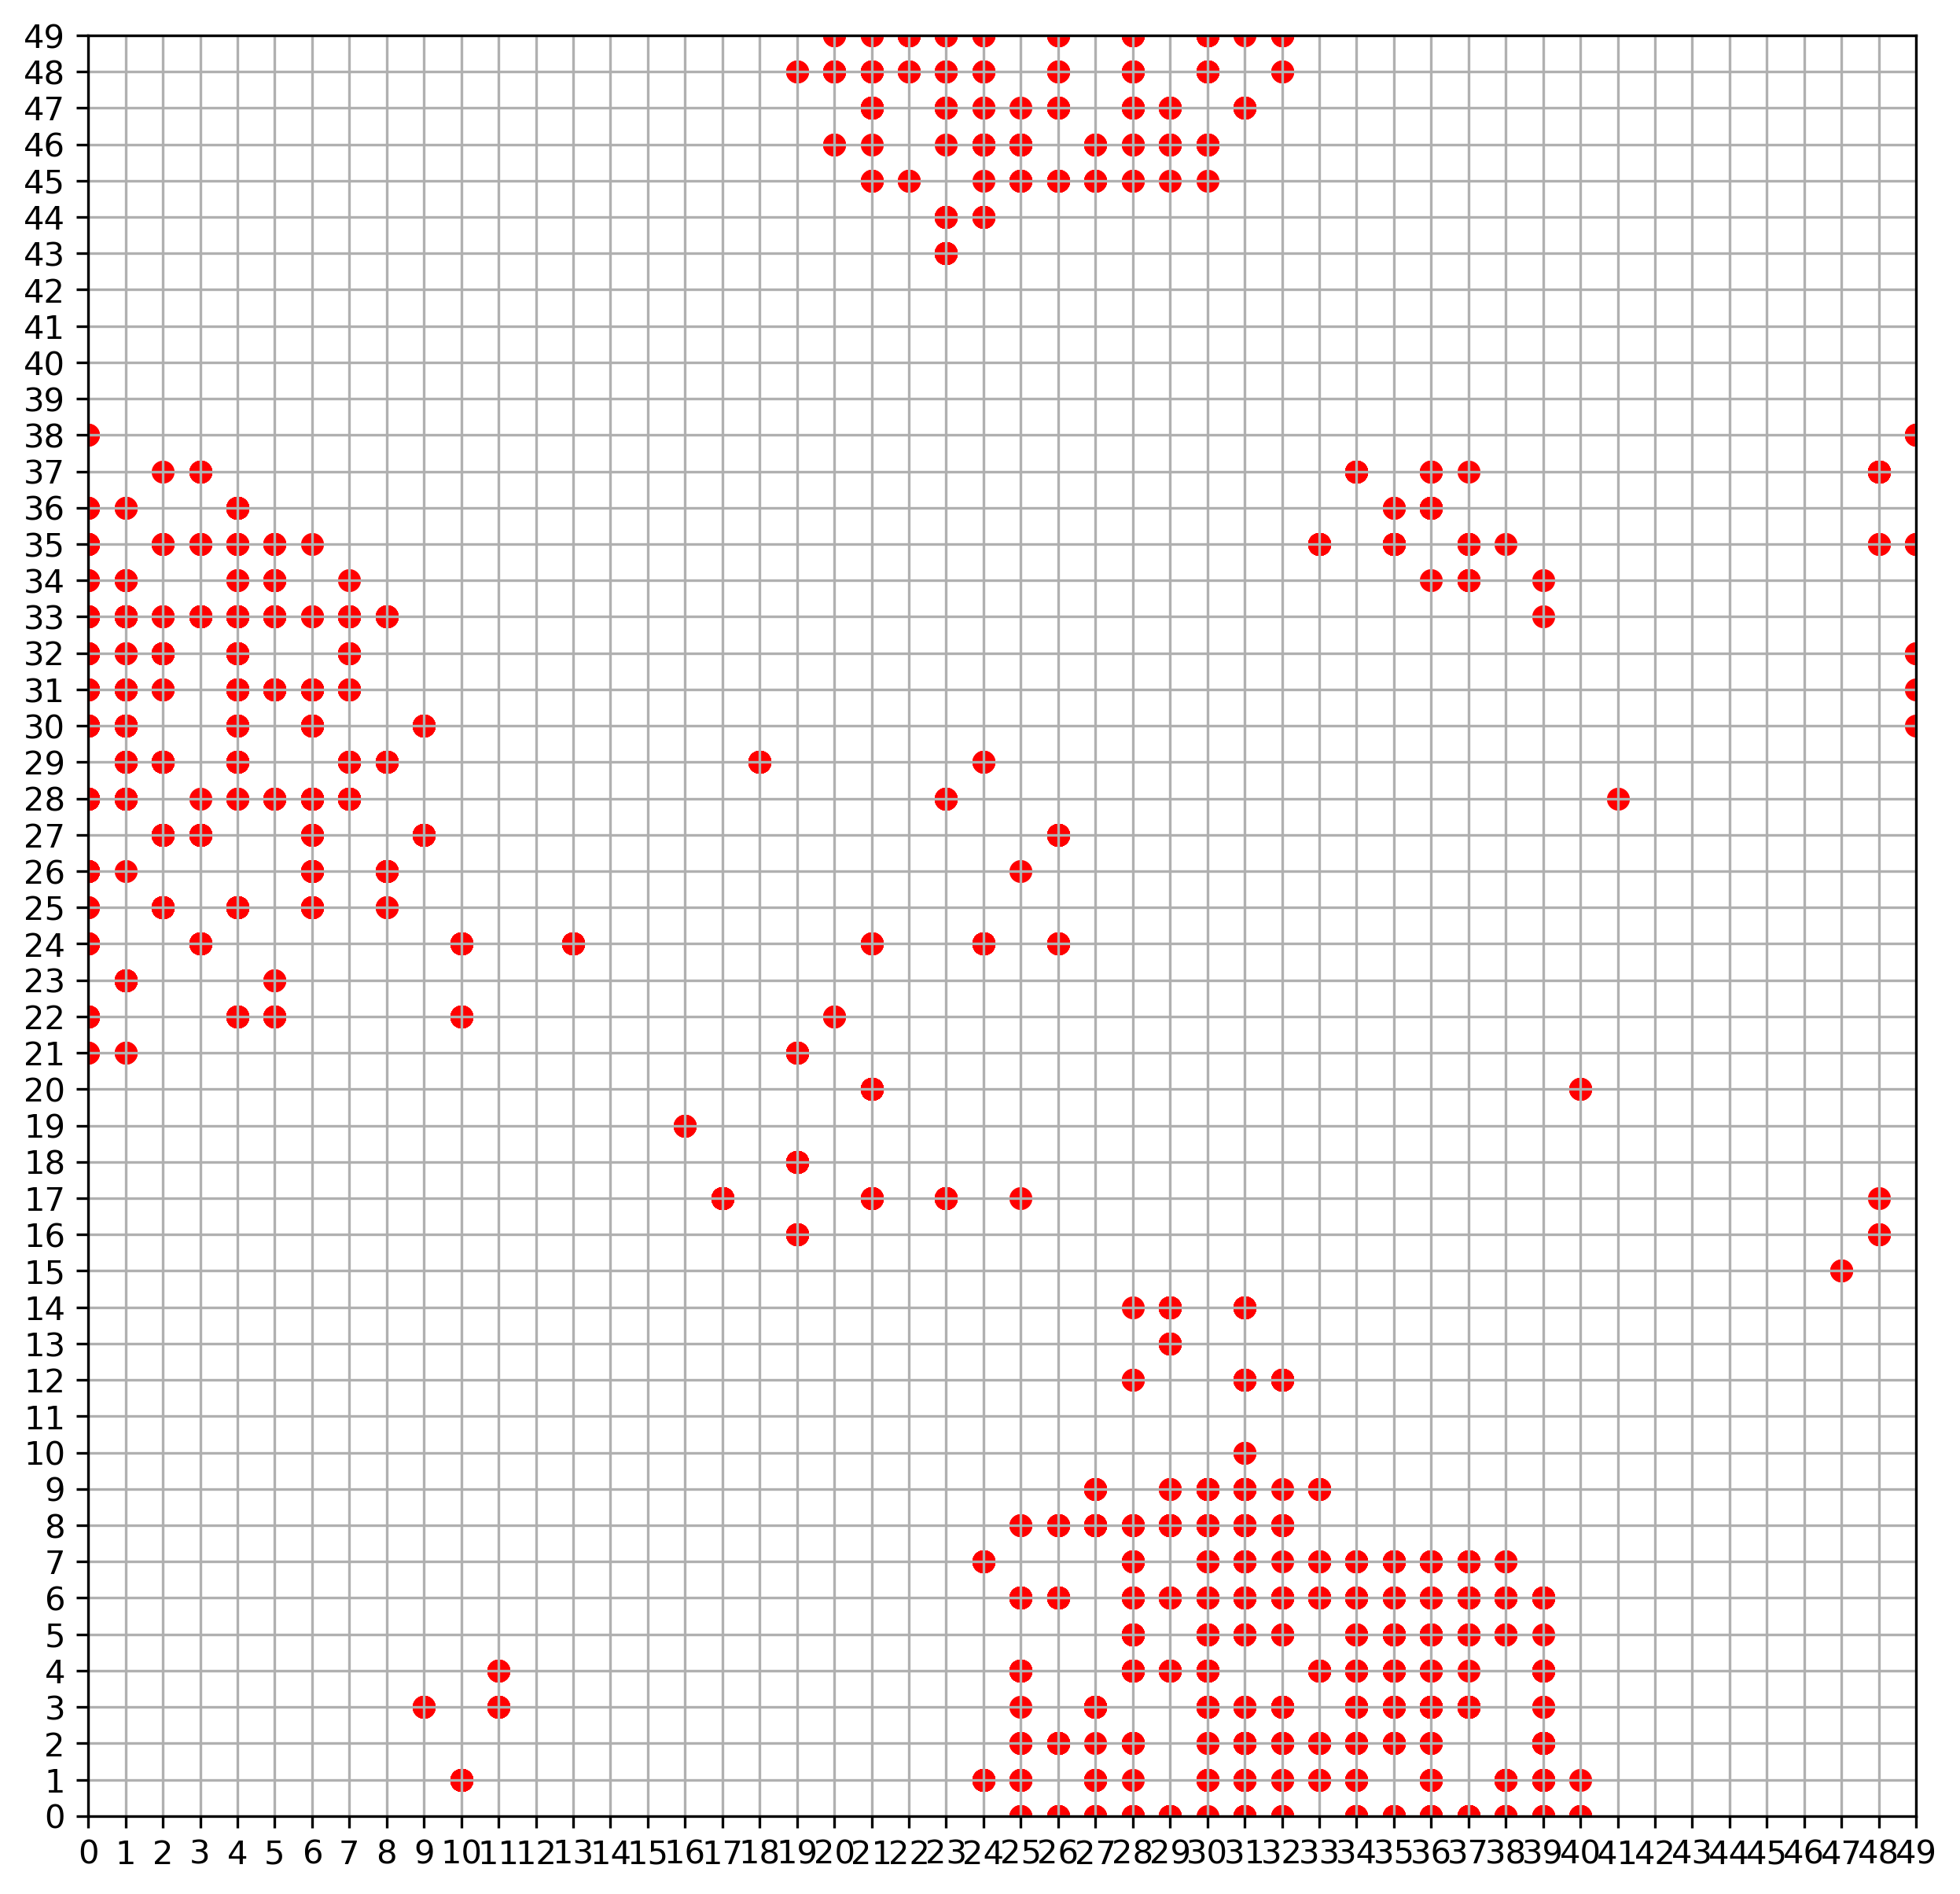

In [10]:
fig = plt.figure(figsize=(10, 10),dpi=300)
ax = fig.add_subplot(111)

for index, datapoint in enumerate(traindata):
    # find the best matching unit of the datapoint
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    
    #plot the best matching unit
    plt.scatter(x_coord,y_coord,c='red')
    
#visualize the grid    
plt.ylim(0,size-1)
plt.xlim(0,size-1)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
plt.grid()

In [11]:
# get the weights of each node
W = som.get_weights()

Using the `get_weights` method of the som object, we can get the `weight` of each node in the SOM. (please refer to Prof.Luna Huang's lecture or the week9 hands-on notebook for the definition of `weight`, `node`)

What `get_weights` returns is an array with size of (`length`,`width`,`N`), `length` and `width` are the length and width of the size of the grid, `N` is the number of features in the training dataset. You can think of this arrays as N matrices with shape of (`length`,`width`), each such matrix is corresponding to the distribution of one features.

Then we can plot a heatmap for each of the features. In each heatmap we can show the distribution of the weight corresponding that feature.
For example in the below, the heatmap of `Number of Atoms` is given. The red region in this map indicates that the nodes in this region are corresponding to molecules with larger number of atoms, and blue region corresponds to molecules with smaller number of atoms. 

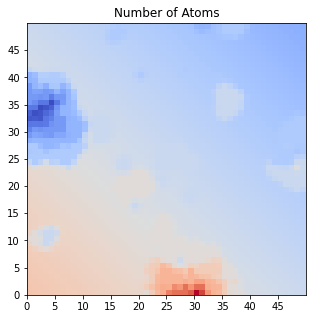

In [12]:
plt.figure(figsize=(5, 5))
plt.title('Number of Atoms')
plt.pcolor(W[:,:,0], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

### To-do 3: Plot the heatmaps for the rest 4 features.

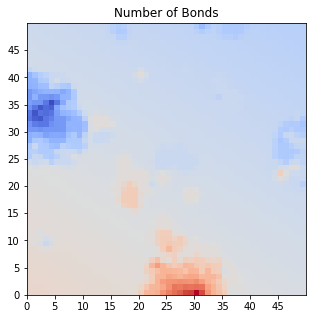

In [13]:
plt.figure(figsize=(5, 5))
plt.title('Number of Bonds')
plt.pcolor(W[:,:,1], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

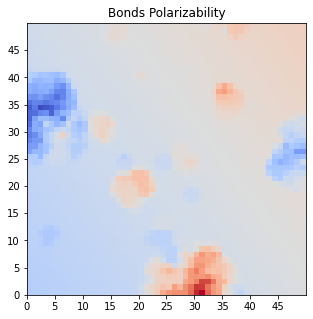

In [14]:
plt.figure(figsize=(5, 5))
plt.title('Bonds Polarizability')
plt.pcolor(W[:,:,2], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

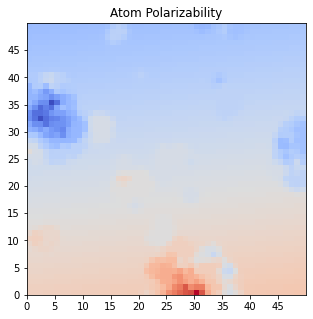

In [15]:
plt.figure(figsize=(5, 5))
plt.title('Atom Polarizability')
plt.pcolor(W[:,:,3], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

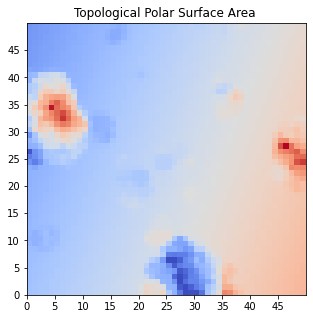

In [16]:
plt.figure(figsize=(5, 5))
plt.title('Topological Polar Surface Area ')
plt.pcolor(W[:,:,4], cmap='coolwarm')
plt.xticks(np.arange(0,size,5))
plt.yticks(np.arange(0,size,5))
plt.show()

### To-do 4: 
Question: What you can observe from these heatmaps? Comparing with the feature correlation diagram you obtained in To-do 1, does it support what you observed from the heatmaps?

'nAtom', 'nBonds','bpol','apol' are highly correlated in each other in positive manner based on the heat map. So the heat map of each features are similar to each other. 

While 'TopoPSA' has negative correlation with other variables, so the heat map plot is different from other features.

## K-means clustering

You may observe some patterns from the heatmaps. For example, some regions seems to have relatively low values for all the features(shown in blue in all the heatmaps), some regions have high values for certain features while one feature value is low, etc.

Let's try performing K-means clustering on the SOM and see if the clustering result will refect the patterns we observed from heatmaps. It's essentially using the weights of all the nodes as the training data for KMeans. 

(If you have difficulty understanding this part, please refer to 'Using SOM in conjunction with other methods' part in the lecture slides)

In [55]:
# X is the training data of the KMeans. each row is the weight of one node.
X = W.reshape(2500,5)

In [56]:
# Fit Kmeans model with 4 clusters
kmeans = KMeans(n_clusters=4,random_state=55).fit(X)

### To-do 5: get the cluster index of each node. (Cluster index are numbers such as 0,1,2,or 3 indicating which cluster each sample belongs to)

* You can refer to: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [57]:
#cluster_labels = kmeans.labels_

In [58]:
cluster_labels = kmeans.predict(X)

In [59]:
cluster_index_0 =[i for i, e in enumerate(cluster_labels) if e == 0]
len(cluster_index_0)

684

In [60]:
cluster_index_1 =[i for i, e in enumerate(cluster_labels) if e == 1]
len(cluster_index_1)

952

In [61]:
cluster_index_2 =[i for i, e in enumerate(cluster_labels) if e == 2]
len(cluster_index_2)

121

In [62]:
cluster_index_3 =[i for i, e in enumerate(cluster_labels) if e == 3]
len(cluster_index_3)

743

We can then visualize the SOM grid along with the clustering result:

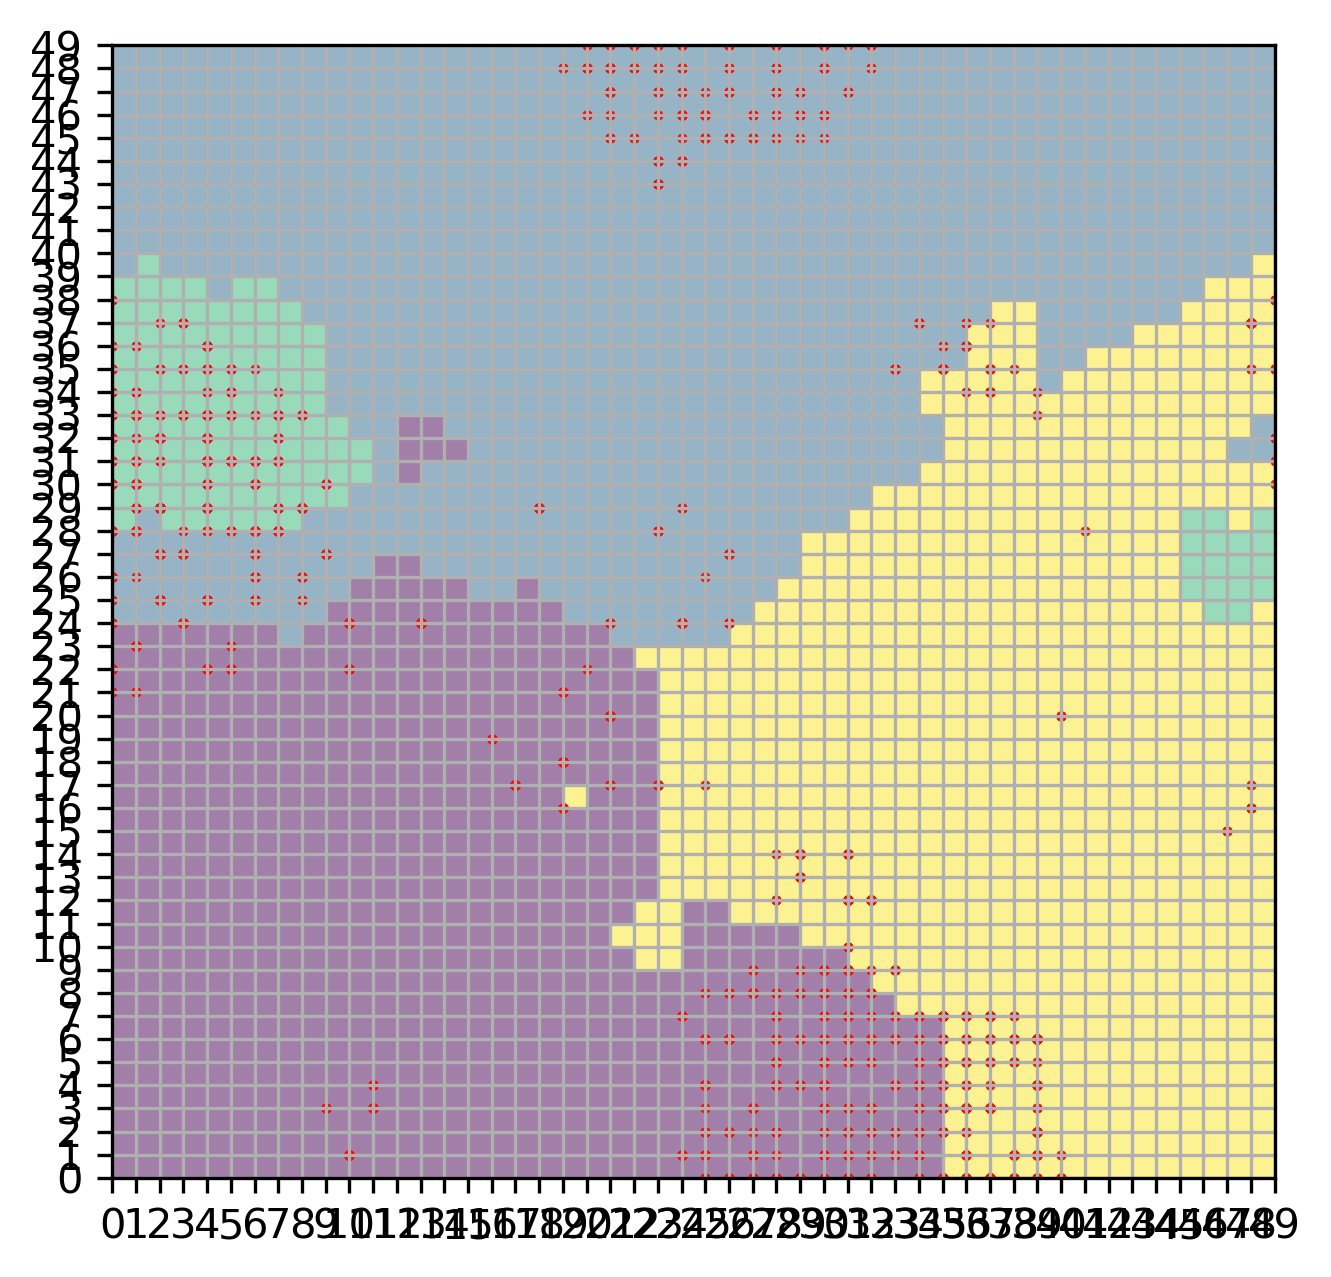

In [25]:
fig = plt.figure(figsize=(5, 5),dpi=300)
ax = fig.add_subplot(111)

plt.pcolor(kmeans.labels_.reshape(50,50),alpha=0.5)

for index, datapoint in enumerate(traindata):
    # find the best matching unit of the datapoint
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    
    #plot the best matching unit
    plt.scatter(x_coord,y_coord,c='red',s=2)
    
#visualize the grid    
plt.ylim(0,size-1)
plt.xlim(0,size-1)
ax.set_xticks(range(size))
ax.set_yticks(range(size))
plt.grid()

### To-do 6: Find the optimal number of clusters using the silhouette method (Please refer to week9 Lecture's notebook about silhouette method)

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
## Set the parameters for KMeans clustering and perform clustering
n_clusters = 7
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
# init = "random", you assign the centroid randomly; n_init = 10 to avoid your randomness get into local minimum instead of globle minimum;
# max_iter, the maximum number of iterations to avoid nonconverged situation. 
#random_state: to make sure you can reproduce your results running multiple times, typically, in real research, you like to use true random instead of a random seed. 


# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 31):
    clusterer = KMeans(n_clusters=k, **kmeans_kwargs)
    clusterer.fit(X)
    score = silhouette_score(X, clusterer.labels_)
    silhouette_coefficients.append(score)

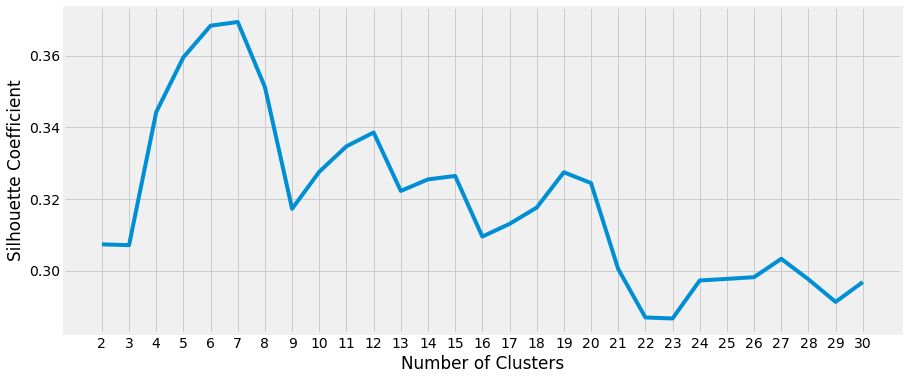

In [28]:
plt.figure(figsize=(15,6))
plt.style.use("fivethirtyeight")
plt.plot(range(2, 31), silhouette_coefficients)
plt.xticks(range(2, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

For n_clusters = 7 The average silhouette_score is : 0.3694856407472243


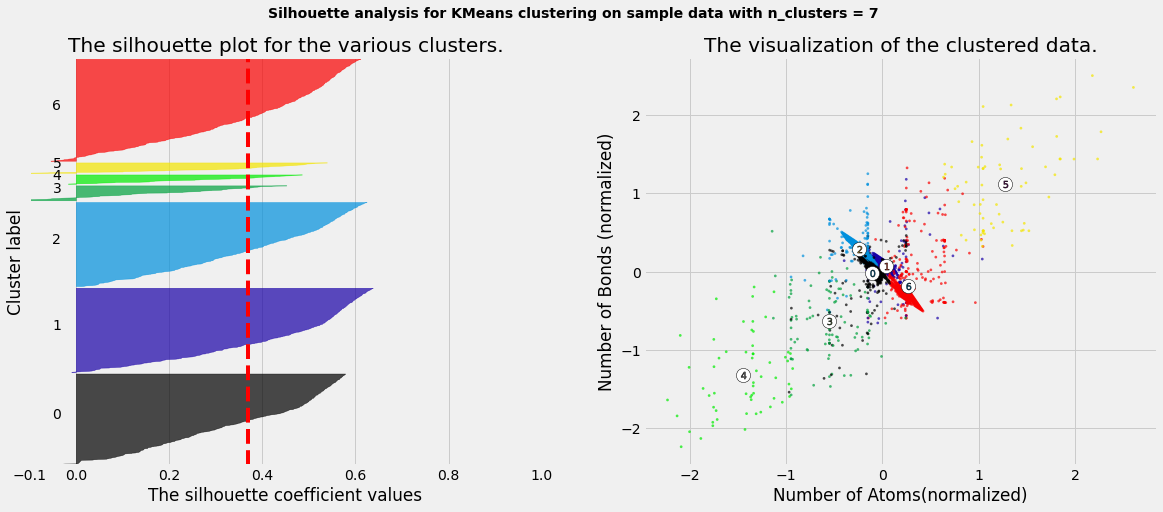

In [29]:
# let's take a look at what silhouette analysis looks like:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
scaled_features=X
X = scaled_features
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters , **kmeans_kwargs)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_
score = silhouette_score(scaled_features, cluster_labels)


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

y_lower = 10
    
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1,0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 1], X[:,2 ], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Number of Atoms(normalized)")
ax2.set_ylabel("Number of Bonds (normalized)")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
           "with n_clusters = %d" % n_clusters),
           fontsize=14, fontweight='bold')

plt.show()

With 7 clusters, the silhoutte plot does not similar thickness. So, try to set the cluster numbers to 3 instead of 7 

For n_clusters = 3 The average silhouette_score is : 0.3070855997139396


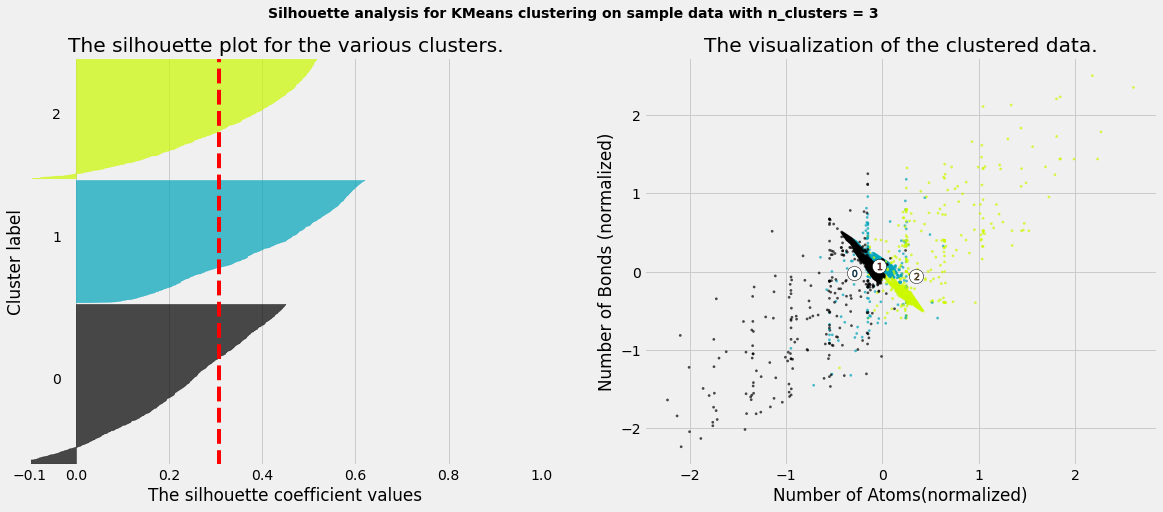

In [30]:
# let's take a look at what silhouette analysis looks like:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
scaled_features=X
X = scaled_features
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters , **kmeans_kwargs)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_
score = silhouette_score(scaled_features, cluster_labels)


# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(scaled_features) + (n_clusters + 1) * 10])


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_features, cluster_labels)

y_lower = 10
    
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1,0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X[:, 1], X[:,2 ], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Number of Atoms(normalized)")
ax2.set_ylabel("Number of Bonds (normalized)")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
           "with n_clusters = %d" % n_clusters),
           fontsize=14, fontweight='bold')

plt.show()

While 7 clusters give the highest coefficient, the clusters do not have equal silhoutte thickness. So i decided to see whether i can sacrifice some coefficient values while keeping the silhoutte thickness equal. Having 3 clusters seem like did a better job. I do not know whether this makes sense.

## To-Do 7 Question and Answer

This question is based on Week9's lecture. Please run the jupyternotebook UnsupervisedML_KMeans_PCA.ipynb (https://canvas.uw.edu/courses/1477118/files/83928883?wrap=1) and answer the question:

* What is the optimal number of clusters for the periodic table data in your opinion? Please explain. Using the optimal number of clusters you chose, identify the elements in one of the cluster and explain if these elements clustered into the same cluster makes sense to you?

In [49]:
kmeans_periodic_result = pd.read_csv("kmeans_result.csv")

In [50]:
kmeans_periodic_result.head()

,index,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,Type,kmeans_cluster_label
0,0,1.007,0,1,1,2.20,13.5984,0.00009,14.175,20.28,Nonmetal,3
1,2,6.941,4,3,3,0.98,5.3917,0.53400,453.850,1615.00,Alkali Metal,6
2,3,9.012,5,4,4,1.57,9.3227,1.85000,1560.150,2742.00,Alkaline Earth Metal,6
3,4,10.811,6,5,5,2.04,8.2980,2.34000,2573.150,4200.00,Metalloid,5
4,5,12.011,6,6,6,2.55,11.2603,2.27000,3948.150,4300.00,Nonmetal,5


In [51]:
label2 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==2]
label2

,index,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,Type,kmeans_cluster_label
70,71,178.490,106,72,72,1.30,6.8251,13.3,2500.15,4876.0,Transition Metal,2
71,72,180.948,108,73,73,1.50,7.5496,16.7,3269.15,5731.0,Transition Metal,2
72,73,183.840,110,74,74,2.36,7.8640,19.3,3680.15,5828.0,Transition Metal,2
73,74,186.207,111,75,75,1.90,7.8335,21.0,3453.15,5869.0,Transition Metal,2
74,75,190.230,114,76,76,2.20,8.4382,22.6,3300.15,5285.0,Transition Metal,2
75,76,192.217,115,77,77,2.20,8.9670,22.6,2716.15,4701.0,Transition Metal,2
76,77,195.084,117,78,78,2.28,8.9587,21.5,2045.15,4098.0,Transition Metal,2
77,78,196.967,118,79,79,2.54,9.2255,19.3,1337.73,3129.0,Transition Metal,2


In [58]:
label0 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==0]
label0[['AtomicMass','Type']]

,AtomicMass,Type
53,132.905,Alkali Metal
54,137.327,Alkaline Earth Metal
55,138.905,Lanthanide
56,140.116,Lanthanide
57,140.908,Lanthanide
58,144.242,Lanthanide
59,145.000,Lanthanide
60,150.360,Lanthanide
61,151.964,Lanthanide
62,157.250,Lanthanide


In [59]:
label1 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==1]
label1[['AtomicMass','Type']]

,AtomicMass,Type
78,200.590,Transition Metal
79,204.383,Metal
80,207.200,Metal
81,208.980,Metal
82,210.000,Metalloid
83,210.000,Noble Gas
84,222.000,Alkali Metal
85,223.000,Alkaline Earth Metal
86,226.000,Actinide


In [60]:
label3 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==3]
label3[['AtomicMass','Type']]

,AtomicMass,Type
0,1.007,Nonmetal
5,14.007,Nonmetal
6,15.999,Nonmetal
7,18.998,Halogen
8,20.180,Noble Gas
13,30.974,Nonmetal
14,32.065,Nonmetal
15,35.453,Halogen


In [61]:
label4 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==4]
label4[['AtomicMass','Type']]

,AtomicMass,Type
28,65.380,Transition Metal
29,69.723,Metal
31,74.922,Metalloid
32,78.960,Nonmetal
33,79.904,Halogen
45,107.868,Transition Metal
46,112.411,Transition Metal
47,114.818,Metal
48,118.710,Metal
49,121.760,Metalloid


In [63]:
label5 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==5]
label5[['AtomicMass','Type']]

,AtomicMass,Type
3,10.811,Metalloid
4,12.011,Nonmetal
12,28.086,Metalloid
19,44.956,Transition Metal
20,47.867,Transition Metal
21,50.942,Transition Metal
22,51.996,Transition Metal
23,54.938,Transition Metal
24,55.845,Transition Metal
25,58.933,Transition Metal


In [64]:
label6 =kmeans_periodic_result.loc[kmeans_periodic_result["kmeans_cluster_label"]==6]
label6[['AtomicMass','Type']]

,AtomicMass,Type
1,6.941,Alkali Metal
2,9.012,Alkaline Earth Metal
9,22.990,Alkali Metal
10,24.305,Alkaline Earth Metal
11,26.982,Metal
16,39.948,Noble Gas
17,39.098,Alkali Metal
18,40.078,Alkaline Earth Metal
34,83.798,Noble Gas
35,85.468,Alkali Metal


So, 7 clustering is  probably best because the groupings is based on the row. However, the clusters sometimes mixed elements from some rows and combine them with others.